## Enunciado

>Considere el proyecto cuya información se adjunta.
> 1. Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración mínima del proyecto?
> 2. Determine duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.
> 3. Determine la probabilidad de que el proyecto se termine antes de 10 periodos.
> 4. Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.
> 5. ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?



In [63]:
!apt install libgraphviz-dev              > /dev/null
%pip install pygraphviz "pandas[excel]"   > /dev/null
%pip install numpyarray_to_latex          > /dev/null
%pip install -q amplpy                    > /dev/null
%pip install jupyter_tikz

%load_ext jupyter_tikz

repo_url = 'https://github.com/mcasl/pmULE'
repo_name = "pmULE"

import os, sys

if not os.path.exists(repo_name):
    print(f"Cloning repository '{repo_name}'...")
    !git clone {repo_url}
    print("Repository cloned successfully!")
else:
    print(f"Good! No need to download the whole '{repo_name}' again. Just checking for changes")
    %cd {repo_name}
    !git pull
    %cd ..

from google.colab import files

# To find local version of the library
sys.path.append('pmULE/src')

from pmule import PredecessorTable, ProjectGraph



The jupyter_tikz extension is already loaded. To reload it, use:
  %reload_ext jupyter_tikz
Good! No need to download the whole 'pmULE' again. Just checking for changes
/content/pmULE
Already up to date.
/content


In [64]:
# Alargamos el ancho de las celdas al 90%
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  nombre, anteriores, duracion, duracion_pesimista, duracion_modal, recursos
     ('A',       '---  ',     2,         2,                    2,           1  ),
     ('B',       'A    ',     2,         3,                    2,           2  ),
     ('C',       'B    ',     3,         4,                    3,           2  ),
     ('D',       'B,J  ',     4,         5,                 17/4,           1  ),
     ('E',       'F,B,J',     1,         1,                    1,           1  ),
     ('F',       'A    ',     2,         3,                    2,           2  ),
     ('G',       'C,D  ',     1,         1,                    1,           1  ),
     ('H',       'E    ',     4,         5,                    4,           1  ),
     ('I',       'B,J  ',     1,         1,                    1,           1  ),
     ('J',       'A    ',     2,         2,                    2,           1  ),
] ,columns=['activity', 'predecessor', 'duration', 'pesimistic_duration', 'modal_duration', 'resources'])
datos_enunciado.set_index('activity', inplace=True)
datos_enunciado

,predecessor,duration,pesimistic_duration,modal_duration,resources
activity,,,,,
A,---,2,2,2.00,1
B,A,2,3,2.00,2
C,B,3,4,3.00,2
D,"B,J",4,5,4.25,1
E,"F,B,J",1,1,1.00,1
F,A,2,3,2.00,2
G,"C,D",1,1,1.00,1
H,E,4,5,4.00,1
I,"B,J",1,1,1.00,1


## Solución
### Apartado 1

> Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración tope del proyecto?


A partir de los datos del enunciado y de la relación $D=\frac{a+4m+b}{6}$ obtenemos la duración optimista $a=6D-b-4m$.

In [65]:
datos_proyecto = datos_enunciado.copy()
datos_proyecto['optimistic_duration'] = datos_proyecto.eval('6*duration - pesimistic_duration - 4*modal_duration')
datos_proyecto

,predecessor,duration,pesimistic_duration,modal_duration,resources,optimistic_duration
activity,,,,,,
A,---,2,2,2.00,1,2.0
B,A,2,3,2.00,2,1.0
C,B,3,4,3.00,2,2.0
D,"B,J",4,5,4.25,1,2.0
E,"F,B,J",1,1,1.00,1,1.0
F,A,2,3,2.00,2,1.0
G,"C,D",1,1,1.00,1,1.0
H,E,4,5,4.00,1,3.0
I,"B,J",1,1,1.00,1,1.0


### Apartado 2
> Determine duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.


#### Duración media del proyecto

In [66]:
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J
activities,,,,,,,,,,
A,,,,,,,,,,
B,True,,,,,,,,,
C,,True,,,,,,,,
D,,True,,,,,,,,True
E,,True,,,,True,,,,True
F,True,,,,,,,,,
G,,,True,True,,,,,,
H,,,,,True,,,,,
I,,True,,,,,,,,True


La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

La varianza de cada actividad no es aportada por el enunciado como dato, pero sí se puede calcular a partir de la expresión $\sigma^2 = \left(\frac{b-a}{6} \right)$

In [67]:
datos_proyecto['variance'] = ((datos_proyecto['pesimistic_duration'] - datos_proyecto['optimistic_duration'])/6)**2
datos_proyecto[['pesimistic_duration', 'optimistic_duration', 'variance']]

,pesimistic_duration,optimistic_duration,variance
activity,,,
A,2,2.0,0.000000
B,3,1.0,0.111111
C,4,2.0,0.111111
D,5,2.0,0.250000
E,1,1.0,0.000000
F,3,1.0,0.111111
G,1,1.0,0.000000
H,5,3.0,0.111111
I,1,1.0,0.000000


##### Grafo PERT con numeración de nodos

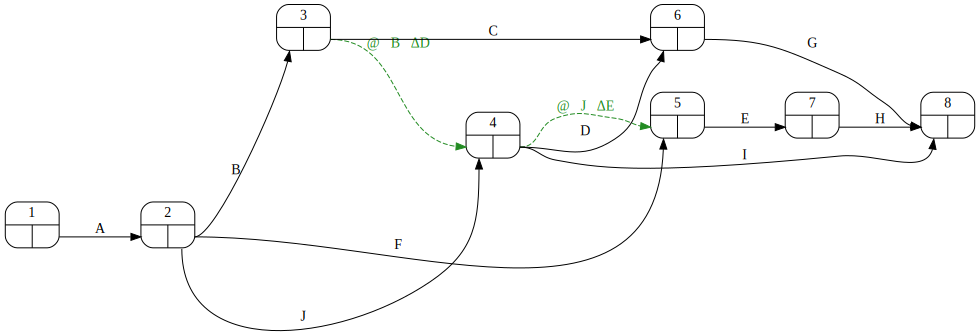

In [68]:
proyecto = prelaciones.create_project()
proyecto.pert(ranksep=1.0)

##### Matriz de Zaderenko

In [69]:
proyecto.zaderenko(durations=datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,early
1,,2.0,,,,,,,0.0
2,,,2.0,2.0,2.0,,,,2.0
3,,,,0.0,,3.0,,,4.0
4,,,,,0.0,4.0,,1.0,4.0
5,,,,,,,1.0,,4.0
6,,,,,,,,1.0,8.0
7,,,,,,,,4.0,5.0
8,,,,,,,,,9.0
late,0.0,2.0,4.0,4.0,4.0,8.0,5.0,9.0,


In [70]:
duraciones_medias = datos_proyecto['duration']
resultados_pert = proyecto.calculate_pert(durations=duraciones_medias)
resultados_pert['nodes']

,early,late
1,0,0
2,2,2
3,4,4
4,4,4
5,4,4
6,8,8
7,5,5
8,9,9


La duración media del proyecto es:

In [71]:
duracion_media_proyecto = proyecto.duration(durations=duraciones_medias)
duracion_media_proyecto

9

#### Varianza de la duración del proyecto
Para determinar la varianza de la duración del proyecto es necesario determinar la varianza de cada rama del camino crítico.

##### Holguras

In [72]:
resultados_pert['activities'][['H_total']]

,H_total
@∇B⤑ΔD,0
@∇J⤑ΔE,0
A,0
B,0
C,1
D,0
E,0
F,0
G,0
H,0


##### Camino crítico

##### Grafo PERT con indicación del camino crítico

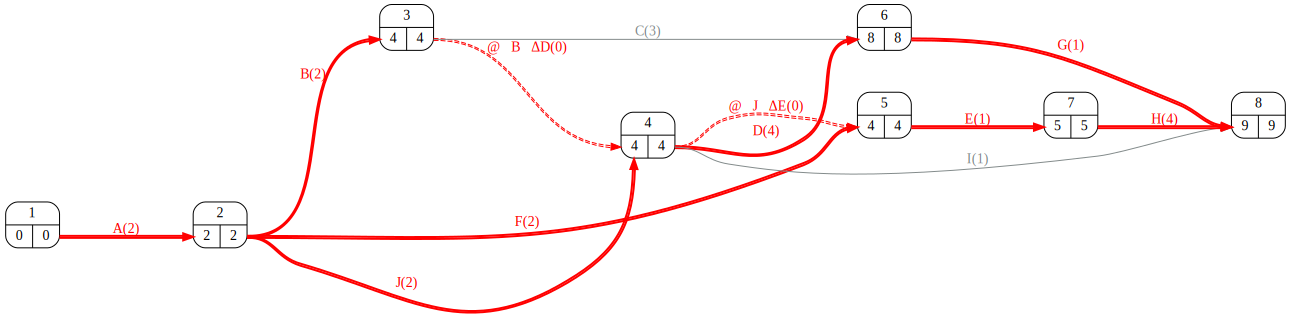

In [73]:
proyecto.pert(durations=duraciones_medias, ranksep=1.5)

In [74]:
camino_critico = proyecto.critical_path(durations=duraciones_medias)
camino_critico

{'Route_1': ['A', 'B', '@∇B⤑ΔD', '@∇J⤑ΔE', 'E', 'H'],
 'Route_2': ['A', 'B', '@∇B⤑ΔD', 'D', 'G'],
 'Route_5': ['A', 'F', 'E', 'H'],
 'Route_6': ['A', 'J', '@∇J⤑ΔE', 'E', 'H'],
 'Route_7': ['A', 'J', 'D', 'G']}

##### Varianza del proyecto

In [75]:
desviacion_proyecto = proyecto.standard_deviation(durations=datos_proyecto['duration'],
                                                  variances=datos_proyecto['variance'])
desviacion_proyecto

Variance path: Route_1 : 0.2222222222222222
Variance path: Route_2 : 0.3611111111111111
Variance path: Route_5 : 0.2222222222222222
Variance path: Route_6 : 0.1111111111111111
Variance path: Route_7 : 0.25
Project duration variance: 0.3611111111111111
Project duration standard deviation: 0.6009252125773316


np.float64(0.6009252125773316)

### Apartado 3
> Determine la probabilidad de que el proyecto se termine antes de 10 periodos.



In [76]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_10 = norm.cdf(10, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_10 * 100

np.float64(95.19538352721634)

### Apartado 4
> Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.


#### Análisis de la situación inicial

Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

In [77]:
!apt-get install -y texlive-latex-extra   > /dev/null
!apt-get install -y poppler-utils         > /dev/null

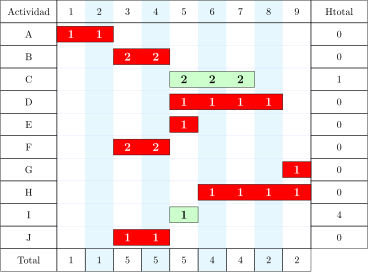

In [78]:
proyecto_asignacion = proyecto.copy()
gantt_df, dibujo = proyecto_asignacion.gantt(datos_proyecto, 'duration', 'resources', total='fila', holguras = True, tikz=True)

from jupyter_tikz import TexFragment
filename = "ejercicio_02/gantt_01"
TexFragment(dibujo).run_latex(save_tikz=filename, save_pdf=filename, save_tex=filename, full_err=True)

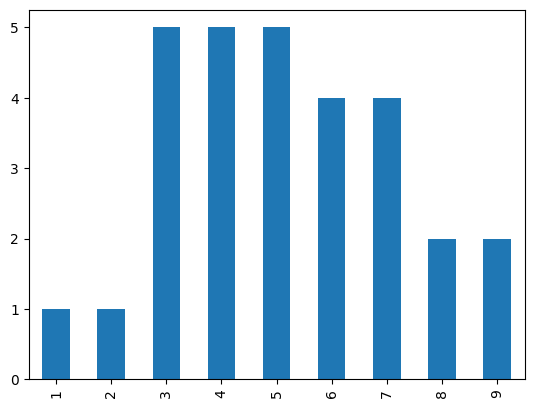

In [79]:
(gantt_df.data.loc['Total'].drop('H_total').plot(kind='bar'));

La demanda de recursos actual infringe el límite impuesto en el enunciado. Es necesario aplicar el algoritmo de asignación.

#### Reprogramación del proyecto utilizando el algoritmo de asignación

 El primer periodo problemático es el 3.

##### Asignación periodo 3

Las tres actividades programadas para el periodo 3 son críticas y de la misma duración. Al disponer de 4 recursos máximo se programan las actividades B y F desplazando la J.

Suma de cuadrados: 105 



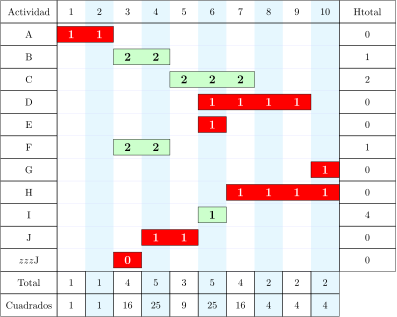

In [80]:
duracion_y_recursos = datos_proyecto[['duration', 'resources']].copy()
duracion_y_recursos, gantt_df, dibujo = proyecto_asignacion.desplazar(duracion_y_recursos, 'duration',  'resources', tikz=True, J = 1)
TexFragment(dibujo.replace('💤',r'$zzz$'), tex_packages="amsmath,amssymb").run_latex()

La actividad *💤J* representa el desplazamiento de las actividad J.

En estas condiciones el proyecto ya es compatible con las restricciones impuestas a los recursos.

### Apartado 5
> ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?

En la programación resultante del apartado anterior los cuatro recursos no serían suficientes pues hay periodos que demandan 5 recursos. Se analiza la posibilidad de reprogramar el proyecto atendiendo a este nuevo límite.

#### Reprogramación del proyecto utilizando el algoritmo de asignación

 El primer periodo problemático es el 4.

##### Asignación periodo 4

Las tres actividades programadas para el periodo 4 son críticas y de la misma duración. Sin embargo las actividades y B y F ya han comenzado su ejecución y se opta por no interrumpirlas. Se desplaza por tanto la J.

Suma de cuadrados: 93 



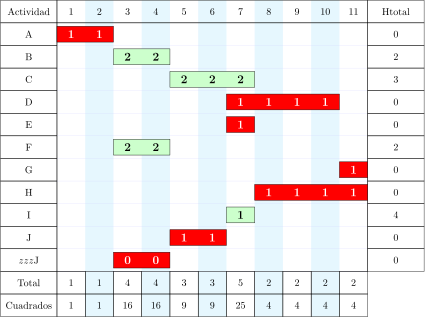

In [81]:
duracion_y_recursos, gantt_df, dibujo = proyecto_asignacion.desplazar(duracion_y_recursos, 'duration', 'resources', tikz=True, J = 1)
TexFragment(dibujo.replace('💤',r'$zzz$'), tex_packages="amsmath,amssymb").run_latex()

El siguiente periodo conflictivo sería el 7.

##### Asignación periodo 7

Las D y E son críticas. Entre ambas consumen dos recursos. De las dos actividades no críticas se opta por desplazar la I por ser la de mayor holgura. La actividad C es posible programarla para este periodo al consumir otros dos recurssos.

Suma de cuadrados: 89 



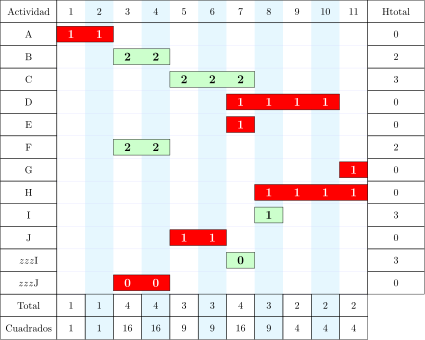

In [82]:
duracion_y_recursos, gantt_df, dibujo = proyecto_asignacion.desplazar(duracion_y_recursos, 'duration', 'resources', tikz=True, I = 1)
TexFragment(dibujo.replace('💤',r'$zzz$'), tex_packages="amsmath,amssymb").run_latex()

En estas condiciones el proyecto ya es viable con 4 recursos. No obstante su duración se ha prolongado hasta 11 periodos.